In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns; sns.set()

from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

## 1. Regresja liniowa

### Zadanie
Dopasuj liniowy trend i wyświetl wyniki:
* stworzyć model LinearRegression
* użyć metody fit
* wygenerować dane dla prostej (np.linspace dla x, model.predict dla y)
* wyniki wyświetl pa pomoca scatter i plot
* wyświetl współczynniki krzywej

In [41]:
rng = np.random.RandomState(2)
x = 11 * rng.rand(100)
y = 2 * x - 5 + rng.randn(100)


In [42]:
def fit(X, Y):
    A = np.sum(X**2)
    B = np.sum(X)
    C = np.sum(X * Y)
    D = np.sum(Y)
    M = X.shape[0]
    b = ((C*B)- (A*D))/((B**2 - (M*A)))
    a = ((D*B) - (C*M))/((B**2)-A*M)
    return a, b

In [43]:
split_point = int(x.shape[0]*0.7) # split dataset 70% / 30% as train / test sets

x_train = x[:split_point]
x_train.shape = (x_train.shape[0], 1)

y_train = y[:split_point]
y_train.shape = (y_train.shape[0], 1)

x_test = x[split_point:]
y_test = y[split_point:]

In [44]:
def model(w, b, x):
    return x.dot(w) + b 

In [45]:
def mean_squared_error(y, y_hat):
    return ((y - y_hat)**2).mean(axis=0)

Slope: 2.0834451293971554, Intercept: -5.373200698848857, Standard error: 0.044599840163049416
MSE = 41.40510249454869


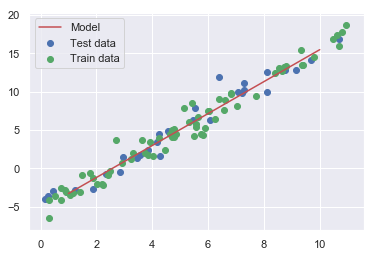

In [46]:
slope, intercept, r_value, p_value, std_err = stats.mstats.linregress(x_train, y_train)

print(f"Slope: {slope}, Intercept: {intercept}, Standard error: {std_err}")

y_test_predicted = model(slope, intercept, y_test)
print(f"MSE = {mean_squared_error(y_test, y_test_predicted)}")

x_base = np.linspace(1.0, 10.0, 100)
x_base.shape = (x_base.shape[0], 1)
y_base = model(slope, intercept, x_base)

plt.scatter(x_test, y_test, c='b', label='Test data')
plt.scatter(x_train, y_train, c='g', label='Train data')
plt.plot(x_base, y_base, c='r', label='Model')

plt.legend()
plt.show()

In [47]:
def r_squared(y, y_hat):
    ss_residuals = np.sum((y - y_hat)**2)
    ss_total = np.sum((y - y.mean())**2)
    return 1 - (ss_residuals/ss_total)

In [48]:
w,b = fit(x_train, y_train)
y_hat = model(w, b, x)

print(f'Model efficiency R^2 = {int(r_squared(y, y_hat) * 100)}%')

Model efficiency R^2 = 96%


## 2. Regresja wielomianowa

### Zadanie
Dopasuj liniowy trend i wyświetl wyniki:
* stworzyć model LinearRegression
* użyć metody fit
* wygenerować dane dla prostej (np.linspace dla x, model.predict dla y)
* wyniki wyświetl za pomocą scatter i plot
* wyświetl współczynniki krzywej

In [49]:

x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])


array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [50]:
def toPolynomial(x, rank):
    x = x.reshape(len(x), 1)
    X = np.ones((len(x), 1))

    for i in range(1, rank):
        X = np.hstack((X, x**i))
    return X

def model(x, w, D):
    w = w.reshape(D, 1)
    return x.dot(w)

def fit(x, t):
    return np.linalg.solve(x.T.dot(x), x.T.dot(t))

In [51]:
N = 50
X = np.linspace(-10,10,N)
X = X.reshape(N,1)
T = np.cos(X/2) + (np.random.randn(N,1)*0.5)
T = T.reshape(N, 1)

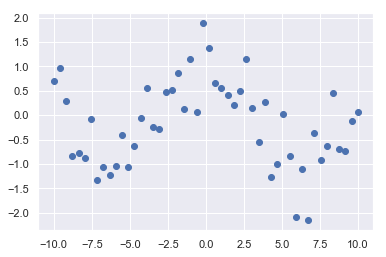

In [52]:
plt.scatter(X, T)
plt.show()

In [53]:
rank = 10
X_poly  = toPolynomial(X, rank)
w = fit(X_poly, T)
Y_100 = model(X_poly, w, rank)


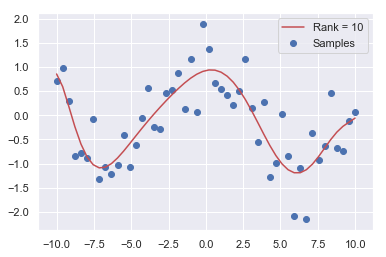

In [54]:
plt.plot(X, Y_100, c='r', label='Rank = 10')
plt.scatter(X, T, label='Samples')

plt.legend()
plt.show()

## 3. Regresja Logistyczna


### Zadanie
Należy stworzyć model regresji logistycznej
* podzielić na dane testujące i trenujące
* stworzyć model
* wytrenować go
* porównać wyniki dla danych testujących przez prezentację ich w postaci confusion matrix

In [55]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data = pd.read_csv("diabetes.csv", header=None, skiprows=[0], names=col_names)

In [56]:
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [57]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = data[feature_cols].values # features
y = data.label.values         # target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [58]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [59]:
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
y_pred = classifier.predict(X_test)
probs_y=classifier.predict_proba(X_test)
probs_y = np.round(probs_y, 2)
res = "{:<10} | {:<10} | {:<10} ".format("y_test", "y_pred", "target(%)\n")
res += "-"*35+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} ".format(x, y, a) for x, y, a in zip(y_test, y_pred, probs_y[:,0]))
res += "\n"+"-"*35+"\n"
print(res)

y_test     | y_pred     | target(%)
 -----------------------------------
1          | 1          | 0.05       
0          | 0          | 0.84       
0          | 0          | 0.9        
1          | 1          | 0.37       
0          | 0          | 0.87       
0          | 0          | 0.96       
1          | 1          | 0.26       
1          | 1          | 0.15       
0          | 0          | 0.59       
0          | 0          | 0.62       
1          | 1          | 0.42       
1          | 1          | 0.04       
0          | 0          | 0.7        
0          | 0          | 0.81       
0          | 0          | 0.88       
0          | 0          | 0.84       
1          | 1          | 0.16       
0          | 0          | 0.97       
0          | 0          | 0.59       
0          | 0          | 0.76       
1          | 1          | 0.36       
1          | 0          | 0.55       
0          | 0          | 0.82       
0          | 0          | 0.93       
0          | 0 

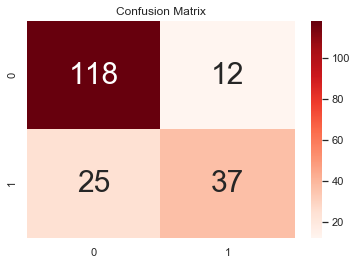

In [61]:
cm = confusion_matrix(y_test, y_pred)
ax = plt.axes()
sns.heatmap(cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Reds", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()